# Telco Customer Churn Dataset (*Kaggle*)

This project focuses on performing Exploratory Data Analysis (EDA) on a telco customer churn dataset.
The goal is to understand customer behavior, identify patterns related to churn, and highlight
potential risk factors that may influence customer retention.

In [1]:
# Importing Liabraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Loading Dataset

In [3]:
# Loading the CSV file into a Pandas Dataframe:
df= pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Finding the null(NaN) values:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Cleaning the Dataset

In [8]:
# Convert SeniorCitizen column from integer (0/1) to boolean (False/True)
df['SeniorCitizen']= df['SeniorCitizen'].astype(bool)

In [9]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')   # Convert TotalCharges to numeric values
df['TotalCharges'].isna().sum()   # Check how many missing values (NaN) exist in TotalCharges

np.int64(11)

In [10]:
# Display rows where TotalCharges is missing
df[df['TotalCharges'].isna()][['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [11]:
df['TotalCharges']= df['TotalCharges'].fillna(0)   # Replace missing TotalCharges values with 0
df['TotalCharges'].isna().sum()   # Confirm that there are no remaining missing values

np.int64(0)

In [12]:
# Calculate the percentage distribution of churned vs non-churned customers
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [13]:
# Compute the average tenure and average monthly charges
df[['tenure', 'MonthlyCharges']].mean()

tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

- **Churn Rate**: 26.53%
- **Retention Rate**: 73.46%
- **Average Customer Tenure**: 32.4 months
- **Average Monthly Charges**: $64.76

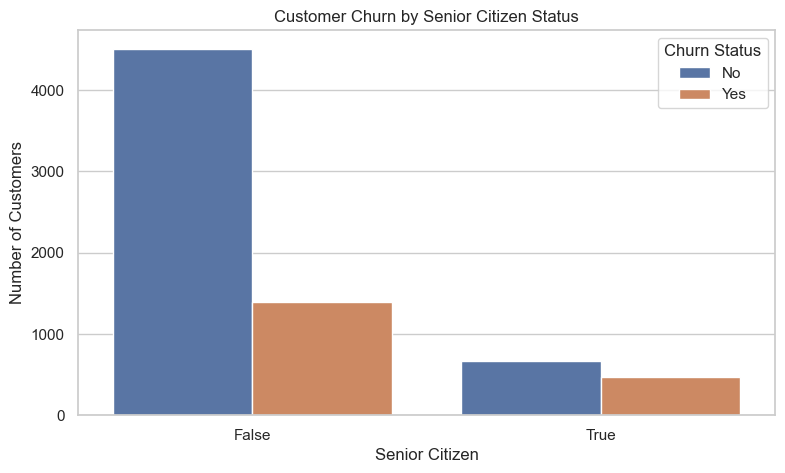

In [14]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title("Customer Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status")
plt.show()

Although `Senior Citizens` represent a smaller portion of the customer base, they reveal a greater level of churn than non-senior clients. This indicates that senior customers are potentially encountering difficulties with the service that make it easier for them to churn.

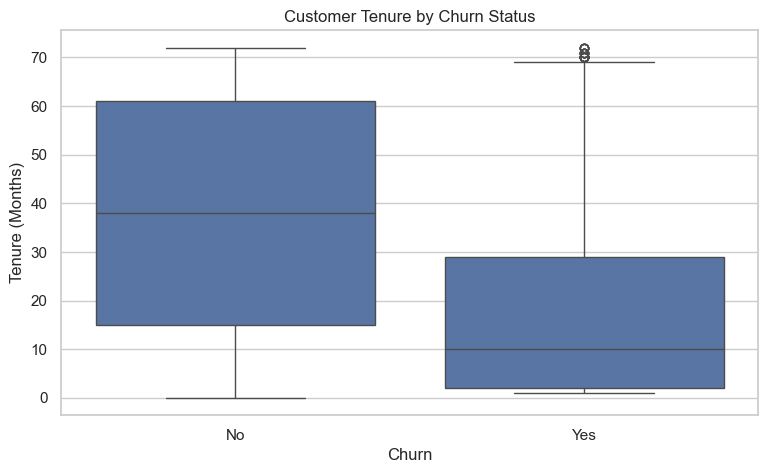

In [15]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='Churn' ,y='tenure')
plt.title("Customer Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

The tenure of churned customers is much shorter compared to retained customers. This points out the fact that the risk of churn is higher in the months when the customer lifecycle just began and therefore the aim should be onboarding and engaging with a fresh customer early enough.

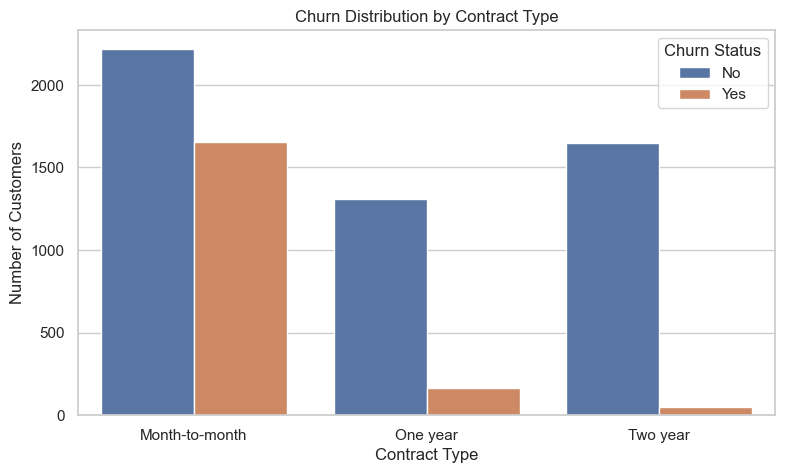

In [16]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn Distribution by Contract Type")
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.show()

Customers on `Month-to-Month` contracts have higher churn rate than customers on `One year` and `Two year` contracts, indicating that longer contract terms lead to better customer retention. 

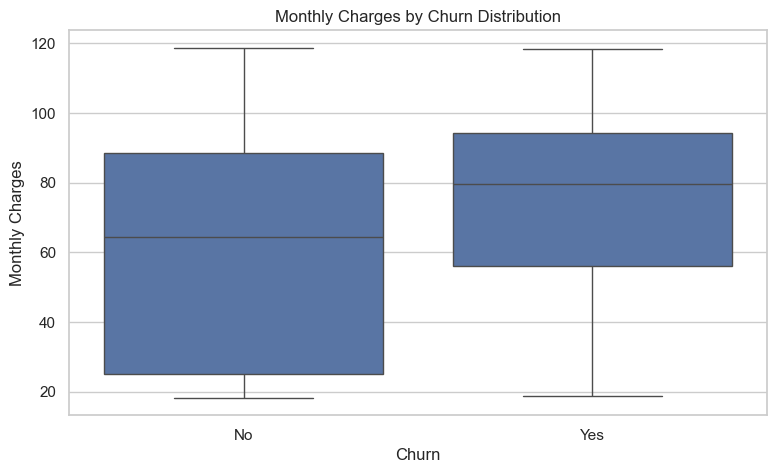

In [17]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn Distribution")
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Customer who churn tend to have relatively higher monthly charges compared to retained customers. It is, therefore, a pointer that the cost aspect may be a reason for customers turning over, especially those who feel the cost is higher than the value obtained.

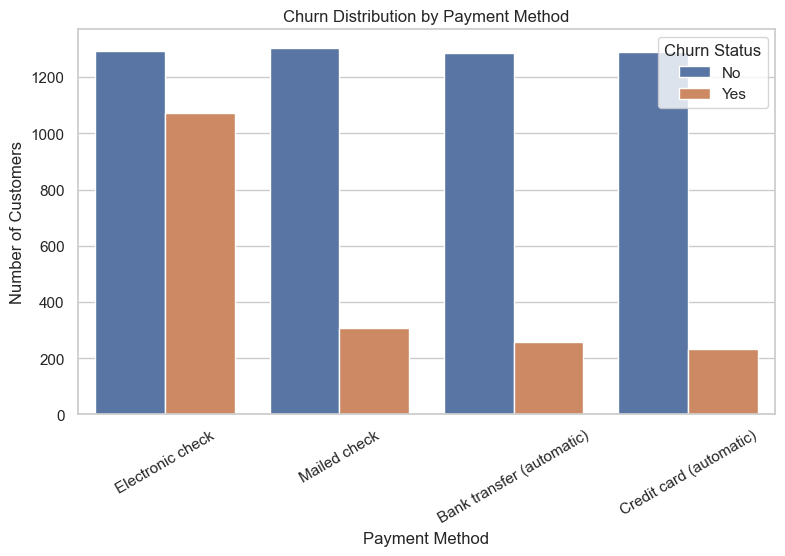

In [18]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn Distribution by Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation= 30)
plt.legend(title='Churn Status')
plt.show()

The rate of churn for customers making `Electronic check` payments is higher than for customers using `Automated payment methods`. This suggests that ease of payment and trust can be associated with loyalty.

### Business Recommendations

- **Improving Early-stage Customer Engagement:** Attention should be focused on retaining customers during the initial few months through onboarding initiatives, welcome bonuses, and assistance.

- **Promoting Long-Term Contracts:** Offer discounts or package discounts for those who switch from `Month-to-Month` plans to `Annual` or `Multi-year` terms.

- **Review Pricing for High-risk Clients:** Offer tiered pricing, discounts for loyal consumers, or special customer services for people paying more each month.

- **Encourage Auto-pay options:** Encourage customers to convert their `Electronic checks` to `Auto-pay` methods in return for small billing discounts or rewards.

- **Offer customized plans to Senior Citizen Customers:** Provide simple plans, dedicated customer service, and Senior-Friendly rates to help retain this type of client.